In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
grossWeight = 2000
cruiseAltitude = 8000 #ft
cruiseSpeed = 150
gForce = 2
V_ROC = 80
ROC = 1500
vLof = 70
groundRun = 900
serviceCeiling = 20000

In [5]:
AR=9
cdMin=0.025
wsInitial = 10 #lb/f**2
wsfromsizing = 23
rhoSL = 0.002378
g = 32.174
CDto = 0.04
CLto = 0.5
groundFriction = 0.04
propEff = 0.8

def oswaldEff (AR):
    e= (1.78*(1-(0.045*AR**0.68)))-0.64
    return e

e = oswaldEff(AR)
print('Oswald Span Efficiency, e = ' +str(e))

k = 1/(math.pi * AR * e)
print ('lift induced drag, k = ' +str(k) )

#dynamic pressure at altitude

def rhoAlt(cruiseAltitude):
    rhoalt = rhoSL*(1-0.0000068756*cruiseAltitude)**4.2561
    return rhoalt
rhoCruise = rhoAlt(cruiseAltitude)
print ('air density at cruise altitude, rho = ' +str(rhoCruise))

qAltitude = 0.5*rhoCruise*(1.688*cruiseSpeed)**2
print('dynamic pressure at altitude = ' +str(qAltitude))

#Gag Ferrar Model
def gagFerrar(bhp):
    normBhp=bhp/(1.132*(rhoCruise/rhoSL)-0.132)
    return normBhp

Oswald Span Efficiency, e = 0.7831239342794879
lift induced drag, k = 0.045162411188559015
air density at cruise altitude, rho = 0.0018691225702070155
dynamic pressure at altitude = 59.9149482826943


In [6]:
WS = np.arange(10,30)
print (WS)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


0.0012669820284852995


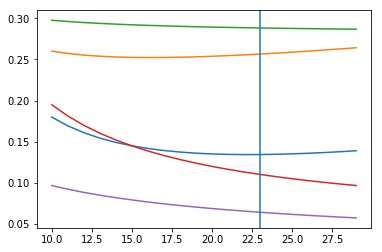

In [7]:
twTurn = qAltitude*( (cdMin/WS)+ k*(gForce/ qAltitude)**2 *(WS) )

qROC = 0.5*rhoSL*(V_ROC*1.688)**2
Vv = ROC/60
twROC = ( (Vv/(V_ROC*1.688)) + (qROC*cdMin/WS)+(k*WS/qROC))

qVlof = 0.5*rhoSL*(vLof*1.688/math.sqrt(2))**2
twVlof = ((vLof*1.688)**2/(2*g*groundRun))+(qVlof*CDto/WS)+(groundFriction*(1-(qVlof*CLto/WS)) ) 

rhoCeiling = rhoAlt(serviceCeiling)
print(rhoCeiling)
twCruise = qAltitude*cdMin*(1/WS) + (k)

twCeiling = (1.667/(np.sqrt((2*WS/rhoCeiling)*math.sqrt(k/3*cdMin))))+((k*cdMin/3)*4)


plt.plot(WS,twTurn)
plt.plot(WS,twROC)
plt.plot(WS,twVlof)
plt.plot(WS,twCruise)
plt.plot(WS,twCeiling)
plt.axvline(x=wsfromsizing)
plt.show()

In [8]:
#### COME UP WITH A METHOD OF EVALUATING THE DESIGN POINT

### FIND INTERSECTIONS WITH AXVLINE AND SORT, MAX VALUE

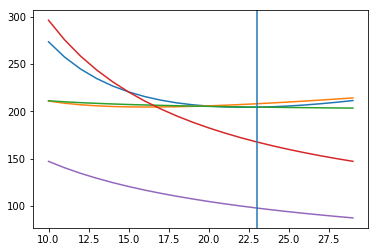

In [9]:
###NORMAlization
norm_twTurn = gagFerrar((grossWeight*twTurn*1.688*cruiseSpeed/(propEff*550)))
test=(grossWeight*twTurn*1.688*cruiseSpeed/(propEff*550))
norm_twROC = gagFerrar((grossWeight*twROC*1.688*V_ROC/(propEff*550)))
norm_twVlof = gagFerrar((grossWeight*twVlof*1.688*vLof/(propEff*550)))
norm_twCruise = gagFerrar((grossWeight*twCruise*1.688*cruiseSpeed/(propEff*550)))
norm_twCeiling = gagFerrar((grossWeight*twCeiling*1.688*cruiseSpeed/(propEff*550)))

plt.plot(WS,norm_twTurn)
plt.plot(WS,norm_twROC)
plt.plot(WS,norm_twVlof)
plt.plot(WS,norm_twCruise)
plt.plot(WS,norm_twCeiling)

         
plt.axvline(x=wsfromsizing)
plt.show()

In [10]:
#### COME UP WITH A METHOD OF EVALUATING THE DESIGN POINT

### FIND INTERSECTIONS WITH AXVLINE AND SORT, MAX VALUE

In [11]:
tw_Turn = qAltitude*( (cdMin/wsInitial)+ k*(gForce/ qAltitude)**2 *(wsInitial) )
print(tw_Turn)

0.17993838475783433


In [12]:
tw_ROC = ( (Vv/(V_ROC*1.688)) + (qROC*cdMin/wsInitial)+(k*wsInitial/qROC))
print(tw_ROC)

0.2601653473257437


In [13]:
tw_Vlof = ((vLof*1.688)**2/(2*g*groundRun))+(qVlof*CDto/wsInitial)+(groundFriction*(1-(qVlof*CLto/wsInitial)) )                       
print(tw_Vlof)

0.2976817949909864


In [14]:
tw_Cruise = qAltitude*cdMin*(1/wsInitial) + (k)
print(tw_Cruise)

0.19494978189529477


In [15]:
tw_Ceiling = (1.667/(math.sqrt((2*wsInitial/rhoCeiling)*math.sqrt(k/3*cdMin))))+(k*cdMin/3)*4
print(tw_Ceiling)

0.09676459852435197


In [16]:
##Selecting the T/W 
twList = ([tw_Ceiling,tw_Cruise,tw_Vlof,tw_ROC,tw_Turn])
maxTW = np.argmax(twList)
V=int(maxTW)
print(V)
finalTW=twList[V]
print(finalTW)

2
0.2976817949909864


In [17]:
#for first case
propThrust = grossWeight*finalTW
print(propThrust)
pBHP=propThrust*(cruiseSpeed*1.688)/(propEff*550)
print(pBHP)

595.3635899819728
342.60468405326253


In [18]:
normBhp = gagFerrar(pBHP)
print(normBhp)

452.1288603011618
